In [1]:
import numpy as np # linear algebra
# version of panda should be 0.25.1 because of .ix function
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# pip install opencv-python
import cv2

# pip install tqdm
from tqdm import tqdm

from sklearn.model_selection import KFold
import time


In [2]:

# Pre-processing the train and test data

x_train = []
x_test = []
y_train = []

df_train = pd.read_csv('./train_v2.csv')
# df_test = pd.read_csv('./dataset/sample_submission_v2.csv')

flatten = lambda l: [item for sublist in l for item in sublist]
labels = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))


In [3]:

labels = ['blow_down',
          'bare_ground',
          'conventional_mine',
          'blooming',
          'cultivation',
          'artisinal_mine',
          'haze',
          'primary',
          'slash_burn',
          'habitation',
          'clear',
          'road',
          'selective_logging',
          'partly_cloudy',
          'agriculture',
          'water',
          'cloudy']

label_map = {'agriculture': 14,
             'artisinal_mine': 5,
             'bare_ground': 1,
             'blooming': 3,
             'blow_down': 0,
             'clear': 10,
             'cloudy': 16,
             'conventional_mine': 2,
             'cultivation': 4,
             'habitation': 9,
             'haze': 6,
             'partly_cloudy': 13,
             'primary': 7,
             'road': 11,
             'selective_logging': 12,
             'slash_burn': 8,
             'water': 15}


In [4]:

for f, tags in tqdm(df_train.values[:9800], miniters=1000):
    print('./train-jpg/train-jpg/{}.jpg'.format(f))
    img = cv2.imread('./train-jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1
    x_train.append(cv2.resize(img, (128, 128)))
    y_train.append(targets)


y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float32) / 255.
# x_test = np.array(x_test, np.float32) / 255.

print(x_train.shape)
print(y_train.shape)


  0%|          | 0/9800 [00:00<?, ?it/s]

./train-jpg/train-jpg/train_0.jpg
./train-jpg/train-jpg/train_1.jpg
./train-jpg/train-jpg/train_2.jpg
./train-jpg/train-jpg/train_3.jpg
./train-jpg/train-jpg/train_4.jpg
./train-jpg/train-jpg/train_5.jpg
./train-jpg/train-jpg/train_6.jpg
./train-jpg/train-jpg/train_7.jpg
./train-jpg/train-jpg/train_8.jpg
./train-jpg/train-jpg/train_9.jpg
./train-jpg/train-jpg/train_10.jpg
./train-jpg/train-jpg/train_11.jpg
./train-jpg/train-jpg/train_12.jpg
./train-jpg/train-jpg/train_13.jpg
./train-jpg/train-jpg/train_14.jpg
./train-jpg/train-jpg/train_15.jpg
./train-jpg/train-jpg/train_16.jpg
./train-jpg/train-jpg/train_17.jpg
./train-jpg/train-jpg/train_18.jpg
./train-jpg/train-jpg/train_19.jpg
./train-jpg/train-jpg/train_20.jpg
./train-jpg/train-jpg/train_21.jpg
./train-jpg/train-jpg/train_22.jpg
./train-jpg/train-jpg/train_23.jpg
./train-jpg/train-jpg/train_24.jpg
./train-jpg/train-jpg/train_25.jpg
./train-jpg/train-jpg/train_26.jpg
./train-jpg/train-jpg/train_27.jpg
./train-jpg/train-jpg/train_28

 10%|█         | 1000/9800 [00:01<00:09, 884.57it/s]

./train-jpg/train-jpg/train_889.jpg
./train-jpg/train-jpg/train_890.jpg
./train-jpg/train-jpg/train_891.jpg
./train-jpg/train-jpg/train_892.jpg
./train-jpg/train-jpg/train_893.jpg
./train-jpg/train-jpg/train_894.jpg
./train-jpg/train-jpg/train_895.jpg
./train-jpg/train-jpg/train_896.jpg
./train-jpg/train-jpg/train_897.jpg
./train-jpg/train-jpg/train_898.jpg
./train-jpg/train-jpg/train_899.jpg
./train-jpg/train-jpg/train_900.jpg
./train-jpg/train-jpg/train_901.jpg
./train-jpg/train-jpg/train_902.jpg
./train-jpg/train-jpg/train_903.jpg
./train-jpg/train-jpg/train_904.jpg
./train-jpg/train-jpg/train_905.jpg
./train-jpg/train-jpg/train_906.jpg
./train-jpg/train-jpg/train_907.jpg
./train-jpg/train-jpg/train_908.jpg
./train-jpg/train-jpg/train_909.jpg
./train-jpg/train-jpg/train_910.jpg
./train-jpg/train-jpg/train_911.jpg
./train-jpg/train-jpg/train_912.jpg
./train-jpg/train-jpg/train_913.jpg
./train-jpg/train-jpg/train_914.jpg
./train-jpg/train-jpg/train_915.jpg
./train-jpg/train-jpg/train_

 20%|██        | 2000/9800 [00:02<00:08, 890.70it/s]

./train-jpg/train-jpg/train_1968.jpg
./train-jpg/train-jpg/train_1969.jpg
./train-jpg/train-jpg/train_1970.jpg
./train-jpg/train-jpg/train_1971.jpg
./train-jpg/train-jpg/train_1972.jpg
./train-jpg/train-jpg/train_1973.jpg
./train-jpg/train-jpg/train_1974.jpg
./train-jpg/train-jpg/train_1975.jpg
./train-jpg/train-jpg/train_1976.jpg
./train-jpg/train-jpg/train_1977.jpg
./train-jpg/train-jpg/train_1978.jpg
./train-jpg/train-jpg/train_1979.jpg
./train-jpg/train-jpg/train_1980.jpg
./train-jpg/train-jpg/train_1981.jpg
./train-jpg/train-jpg/train_1982.jpg
./train-jpg/train-jpg/train_1983.jpg
./train-jpg/train-jpg/train_1984.jpg
./train-jpg/train-jpg/train_1985.jpg
./train-jpg/train-jpg/train_1986.jpg
./train-jpg/train-jpg/train_1987.jpg
./train-jpg/train-jpg/train_1988.jpg
./train-jpg/train-jpg/train_1989.jpg
./train-jpg/train-jpg/train_1990.jpg
./train-jpg/train-jpg/train_1991.jpg
./train-jpg/train-jpg/train_1992.jpg
./train-jpg/train-jpg/train_1993.jpg
./train-jpg/train-jpg/train_1994.jpg
.

 31%|███       | 3000/9800 [00:03<00:07, 873.81it/s]

./train-jpg/train-jpg/train_2841.jpg
./train-jpg/train-jpg/train_2842.jpg
./train-jpg/train-jpg/train_2843.jpg
./train-jpg/train-jpg/train_2844.jpg
./train-jpg/train-jpg/train_2845.jpg
./train-jpg/train-jpg/train_2846.jpg
./train-jpg/train-jpg/train_2847.jpg
./train-jpg/train-jpg/train_2848.jpg
./train-jpg/train-jpg/train_2849.jpg
./train-jpg/train-jpg/train_2850.jpg
./train-jpg/train-jpg/train_2851.jpg
./train-jpg/train-jpg/train_2852.jpg
./train-jpg/train-jpg/train_2853.jpg
./train-jpg/train-jpg/train_2854.jpg
./train-jpg/train-jpg/train_2855.jpg
./train-jpg/train-jpg/train_2856.jpg
./train-jpg/train-jpg/train_2857.jpg
./train-jpg/train-jpg/train_2858.jpg
./train-jpg/train-jpg/train_2859.jpg
./train-jpg/train-jpg/train_2860.jpg
./train-jpg/train-jpg/train_2861.jpg
./train-jpg/train-jpg/train_2862.jpg
./train-jpg/train-jpg/train_2863.jpg
./train-jpg/train-jpg/train_2864.jpg
./train-jpg/train-jpg/train_2865.jpg
./train-jpg/train-jpg/train_2866.jpg
./train-jpg/train-jpg/train_2867.jpg
.

 41%|████      | 4000/9800 [00:05<00:08, 713.39it/s]

./train-jpg/train-jpg/train_3969.jpg
./train-jpg/train-jpg/train_3970.jpg
./train-jpg/train-jpg/train_3971.jpg
./train-jpg/train-jpg/train_3972.jpg
./train-jpg/train-jpg/train_3973.jpg
./train-jpg/train-jpg/train_3974.jpg
./train-jpg/train-jpg/train_3975.jpg
./train-jpg/train-jpg/train_3976.jpg
./train-jpg/train-jpg/train_3977.jpg
./train-jpg/train-jpg/train_3978.jpg
./train-jpg/train-jpg/train_3979.jpg
./train-jpg/train-jpg/train_3980.jpg
./train-jpg/train-jpg/train_3981.jpg
./train-jpg/train-jpg/train_3982.jpg
./train-jpg/train-jpg/train_3983.jpg
./train-jpg/train-jpg/train_3984.jpg
./train-jpg/train-jpg/train_3985.jpg
./train-jpg/train-jpg/train_3986.jpg
./train-jpg/train-jpg/train_3987.jpg
./train-jpg/train-jpg/train_3988.jpg
./train-jpg/train-jpg/train_3989.jpg
./train-jpg/train-jpg/train_3990.jpg
./train-jpg/train-jpg/train_3991.jpg
./train-jpg/train-jpg/train_3992.jpg
./train-jpg/train-jpg/train_3993.jpg
./train-jpg/train-jpg/train_3994.jpg
./train-jpg/train-jpg/train_3995.jpg
.

 51%|█████     | 5000/9800 [00:06<00:06, 756.70it/s]

./train-jpg/train-jpg/train_4996.jpg
./train-jpg/train-jpg/train_4997.jpg
./train-jpg/train-jpg/train_4998.jpg
./train-jpg/train-jpg/train_4999.jpg
./train-jpg/train-jpg/train_5000.jpg
./train-jpg/train-jpg/train_5001.jpg
./train-jpg/train-jpg/train_5002.jpg
./train-jpg/train-jpg/train_5003.jpg
./train-jpg/train-jpg/train_5004.jpg
./train-jpg/train-jpg/train_5005.jpg
./train-jpg/train-jpg/train_5006.jpg
./train-jpg/train-jpg/train_5007.jpg
./train-jpg/train-jpg/train_5008.jpg
./train-jpg/train-jpg/train_5009.jpg
./train-jpg/train-jpg/train_5010.jpg
./train-jpg/train-jpg/train_5011.jpg
./train-jpg/train-jpg/train_5012.jpg
./train-jpg/train-jpg/train_5013.jpg
./train-jpg/train-jpg/train_5014.jpg
./train-jpg/train-jpg/train_5015.jpg
./train-jpg/train-jpg/train_5016.jpg
./train-jpg/train-jpg/train_5017.jpg
./train-jpg/train-jpg/train_5018.jpg
./train-jpg/train-jpg/train_5019.jpg
./train-jpg/train-jpg/train_5020.jpg
./train-jpg/train-jpg/train_5021.jpg
./train-jpg/train-jpg/train_5022.jpg
.

 61%|██████    | 6000/9800 [00:07<00:04, 772.65it/s]

./train-jpg/train-jpg/train_5973.jpg
./train-jpg/train-jpg/train_5974.jpg
./train-jpg/train-jpg/train_5975.jpg
./train-jpg/train-jpg/train_5976.jpg
./train-jpg/train-jpg/train_5977.jpg
./train-jpg/train-jpg/train_5978.jpg
./train-jpg/train-jpg/train_5979.jpg
./train-jpg/train-jpg/train_5980.jpg
./train-jpg/train-jpg/train_5981.jpg
./train-jpg/train-jpg/train_5982.jpg
./train-jpg/train-jpg/train_5983.jpg
./train-jpg/train-jpg/train_5984.jpg
./train-jpg/train-jpg/train_5985.jpg
./train-jpg/train-jpg/train_5986.jpg
./train-jpg/train-jpg/train_5987.jpg
./train-jpg/train-jpg/train_5988.jpg
./train-jpg/train-jpg/train_5989.jpg
./train-jpg/train-jpg/train_5990.jpg
./train-jpg/train-jpg/train_5991.jpg
./train-jpg/train-jpg/train_5992.jpg
./train-jpg/train-jpg/train_5993.jpg
./train-jpg/train-jpg/train_5994.jpg
./train-jpg/train-jpg/train_5995.jpg
./train-jpg/train-jpg/train_5996.jpg
./train-jpg/train-jpg/train_5997.jpg
./train-jpg/train-jpg/train_5998.jpg
./train-jpg/train-jpg/train_5999.jpg
.

 71%|███████▏  | 7000/9800 [00:08<00:03, 791.64it/s]

./train-jpg/train-jpg/train_6982.jpg
./train-jpg/train-jpg/train_6983.jpg
./train-jpg/train-jpg/train_6984.jpg
./train-jpg/train-jpg/train_6985.jpg
./train-jpg/train-jpg/train_6986.jpg
./train-jpg/train-jpg/train_6987.jpg
./train-jpg/train-jpg/train_6988.jpg
./train-jpg/train-jpg/train_6989.jpg
./train-jpg/train-jpg/train_6990.jpg
./train-jpg/train-jpg/train_6991.jpg
./train-jpg/train-jpg/train_6992.jpg
./train-jpg/train-jpg/train_6993.jpg
./train-jpg/train-jpg/train_6994.jpg
./train-jpg/train-jpg/train_6995.jpg
./train-jpg/train-jpg/train_6996.jpg
./train-jpg/train-jpg/train_6997.jpg
./train-jpg/train-jpg/train_6998.jpg
./train-jpg/train-jpg/train_6999.jpg
./train-jpg/train-jpg/train_7000.jpg
./train-jpg/train-jpg/train_7001.jpg
./train-jpg/train-jpg/train_7002.jpg
./train-jpg/train-jpg/train_7003.jpg
./train-jpg/train-jpg/train_7004.jpg
./train-jpg/train-jpg/train_7005.jpg
./train-jpg/train-jpg/train_7006.jpg
./train-jpg/train-jpg/train_7007.jpg
./train-jpg/train-jpg/train_7008.jpg
.

 82%|████████▏ | 8000/9800 [00:09<00:02, 814.84it/s]

./train-jpg/train-jpg/train_7851.jpg
./train-jpg/train-jpg/train_7852.jpg
./train-jpg/train-jpg/train_7853.jpg
./train-jpg/train-jpg/train_7854.jpg
./train-jpg/train-jpg/train_7855.jpg
./train-jpg/train-jpg/train_7856.jpg
./train-jpg/train-jpg/train_7857.jpg
./train-jpg/train-jpg/train_7858.jpg
./train-jpg/train-jpg/train_7859.jpg
./train-jpg/train-jpg/train_7860.jpg
./train-jpg/train-jpg/train_7861.jpg
./train-jpg/train-jpg/train_7862.jpg
./train-jpg/train-jpg/train_7863.jpg
./train-jpg/train-jpg/train_7864.jpg
./train-jpg/train-jpg/train_7865.jpg
./train-jpg/train-jpg/train_7866.jpg
./train-jpg/train-jpg/train_7867.jpg
./train-jpg/train-jpg/train_7868.jpg
./train-jpg/train-jpg/train_7869.jpg
./train-jpg/train-jpg/train_7870.jpg
./train-jpg/train-jpg/train_7871.jpg
./train-jpg/train-jpg/train_7872.jpg
./train-jpg/train-jpg/train_7873.jpg
./train-jpg/train-jpg/train_7874.jpg
./train-jpg/train-jpg/train_7875.jpg
./train-jpg/train-jpg/train_7876.jpg
./train-jpg/train-jpg/train_7877.jpg
.

 92%|█████████▏| 9000/9800 [00:11<00:00, 823.85it/s]

./train-jpg/train-jpg/train_8861.jpg
./train-jpg/train-jpg/train_8862.jpg
./train-jpg/train-jpg/train_8863.jpg
./train-jpg/train-jpg/train_8864.jpg
./train-jpg/train-jpg/train_8865.jpg
./train-jpg/train-jpg/train_8866.jpg
./train-jpg/train-jpg/train_8867.jpg
./train-jpg/train-jpg/train_8868.jpg
./train-jpg/train-jpg/train_8869.jpg
./train-jpg/train-jpg/train_8870.jpg
./train-jpg/train-jpg/train_8871.jpg
./train-jpg/train-jpg/train_8872.jpg
./train-jpg/train-jpg/train_8873.jpg
./train-jpg/train-jpg/train_8874.jpg
./train-jpg/train-jpg/train_8875.jpg
./train-jpg/train-jpg/train_8876.jpg
./train-jpg/train-jpg/train_8877.jpg
./train-jpg/train-jpg/train_8878.jpg
./train-jpg/train-jpg/train_8879.jpg
./train-jpg/train-jpg/train_8880.jpg
./train-jpg/train-jpg/train_8881.jpg
./train-jpg/train-jpg/train_8882.jpg
./train-jpg/train-jpg/train_8883.jpg
./train-jpg/train-jpg/train_8884.jpg
./train-jpg/train-jpg/train_8885.jpg
./train-jpg/train-jpg/train_8886.jpg
./train-jpg/train-jpg/train_8887.jpg
.

100%|██████████| 9800/9800 [00:12<00:00, 809.06it/s]

./train-jpg/train-jpg/train_9707.jpg
./train-jpg/train-jpg/train_9708.jpg
./train-jpg/train-jpg/train_9709.jpg
./train-jpg/train-jpg/train_9710.jpg
./train-jpg/train-jpg/train_9711.jpg
./train-jpg/train-jpg/train_9712.jpg
./train-jpg/train-jpg/train_9713.jpg
./train-jpg/train-jpg/train_9714.jpg
./train-jpg/train-jpg/train_9715.jpg
./train-jpg/train-jpg/train_9716.jpg
./train-jpg/train-jpg/train_9717.jpg
./train-jpg/train-jpg/train_9718.jpg
./train-jpg/train-jpg/train_9719.jpg
./train-jpg/train-jpg/train_9720.jpg
./train-jpg/train-jpg/train_9721.jpg
./train-jpg/train-jpg/train_9722.jpg
./train-jpg/train-jpg/train_9723.jpg
./train-jpg/train-jpg/train_9724.jpg
./train-jpg/train-jpg/train_9725.jpg
./train-jpg/train-jpg/train_9726.jpg
./train-jpg/train-jpg/train_9727.jpg
./train-jpg/train-jpg/train_9728.jpg
./train-jpg/train-jpg/train_9729.jpg
./train-jpg/train-jpg/train_9730.jpg
./train-jpg/train-jpg/train_9731.jpg
./train-jpg/train-jpg/train_9732.jpg
./train-jpg/train-jpg/train_9733.jpg
.

(9800, 128, 128, 3)
(9800, 17)


In [5]:

###############################

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import fbeta_score

X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print('Training data shape:', X_train.shape, Y_train.shape)
print('Validation data shape:', X_valid.shape, Y_valid.shape)

kfold_weights_path = os.path.join('', 'weights.keras')

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dropout(0.2),
    Dense(17, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Training data shape: (7840, 128, 128, 3) (7840, 17)
Validation data shape: (1960, 128, 128, 3) (1960, 17)


In [6]:

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0)
]

model.fit(x=X_train, y=Y_train, validation_data=(X_valid, Y_valid),
          batch_size=128, verbose=1, epochs=30, callbacks=callbacks,
          shuffle=True)

print(model.summary())

if os.path.isfile(kfold_weights_path):
    model.load_weights(kfold_weights_path)

p_valid = model.predict(X_valid, batch_size=128, verbose=2)
print("F beta score: " + str(fbeta_score(Y_valid, np.array(p_valid) > 0.2, beta=2, average='samples')))

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 357s 6s/step - accuracy: 0.5029 - loss: 0.4014 - val_accuracy: 0.7240 - val_loss: 0.2407
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 353s 6s/step - accuracy: 0.7155 - loss: 0.2401 - val_accuracy: 0.7240 - val_loss: 0.2147
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 366s 6s/step - accuracy: 0.7063 - loss: 0.2144 - val_accuracy: 0.7240 - val_loss: 0.1980
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 356s 6s/step - accuracy: 0.6764 - loss: 0.1972 - val_accuracy: 0.7230 - val_loss: 0.1866
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 360s 6s/step - accuracy: 0.6750 - loss: 0.1841 - val_accuracy: 0.7230 - val_loss: 0.1797
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 370s 6s/step - accuracy: 0.6785 - loss: 0.1778 - val_accuracy: 0.7194 - val_loss: 0.1724
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 353s 6s/step - accuracy: 0.6764 - loss: 0.1721 - val_accuracy: 0.7122 - val_loss: 0.1676
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 350s 6s/step - accuracy: 0.6618 - loss: 0.1633 - val_accuracy: 0.7051 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,867,381 (68.16 MB)

 Trainable params: 1,050,897 (4.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,101,796 (8.02 MB)

None
16/16 - 68s - 4s/step
F beta score: 0.8725671349852613


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0]
Predicted Classes: ['primary', 'clear', 'road', 'agriculture']


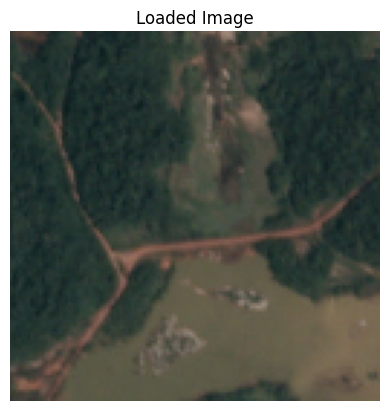

In [10]:
# Predict the class probabilities
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = './train-jpg/train_9869.jpg'  
img = image.load_img(img_path, target_size=(128, 128)) 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0 
predictions = model.predict(img_array)
predicted_classes = (predictions > 0.5).astype(int)[0] 
print(predicted_classes)
class_names = [labels[i] for i in range(len(predicted_classes)) if  predicted_classes[i] > 0]
print("Predicted Classes:", class_names)


plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title('Loaded Image')
plt.show()